In [122]:
import sys        
import random
import warnings
import os

import time
import numpy as np
import pandas as pd
import collections, functools, operator

sys.path.append('/Users/moises/Desktop/Produccion-Tesis')
from M2 import *

# Parameters of system
warnings.filterwarnings("ignore")


#### Analisis de resultados

In [123]:
escenario_A = 6
escenario_B = 12
escenario_C = 12
q = 10000
variable = 'Cuarto de Pollo Superior'
os.chdir('/Users/moises/Desktop/Produccion-Tesis')

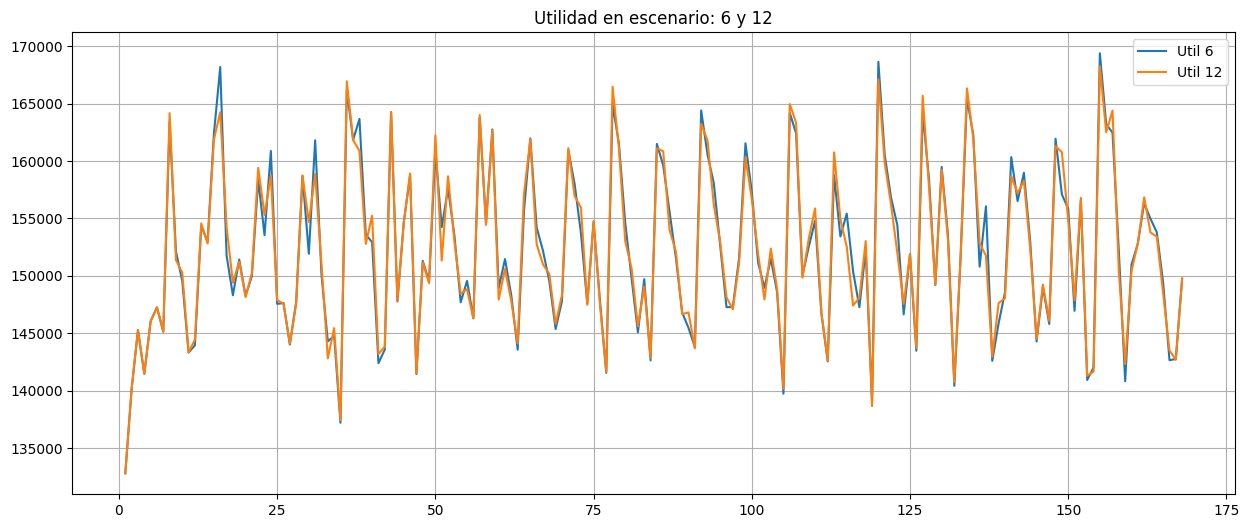

In [124]:
def generador_utilidad(experiment, replics=50):
    file_name = f"Resultados/{q}/Escenario {experiment}/"
    P = pd.read_csv(file_name+"objective_value.csv", sep=";")
    P['value'] = P['value']/replics
    P = P.groupby(['t']).sum().reset_index()[['t','value']]
    return P

util_A = generador_utilidad(escenario_A)
util_B = generador_utilidad(escenario_B)


plt.figure(figsize=(15,6))
plt.grid(True)

# Utilidades
plt.plot(util_A.t, util_A.value, label=f"Util {escenario_A}")
plt.plot(util_B.t, util_B.value, label=f"Util {escenario_B}")

plt.legend()
plt.title(label=f"Utilidad en escenario: {escenario_A} y {escenario_B}")
plt.show()

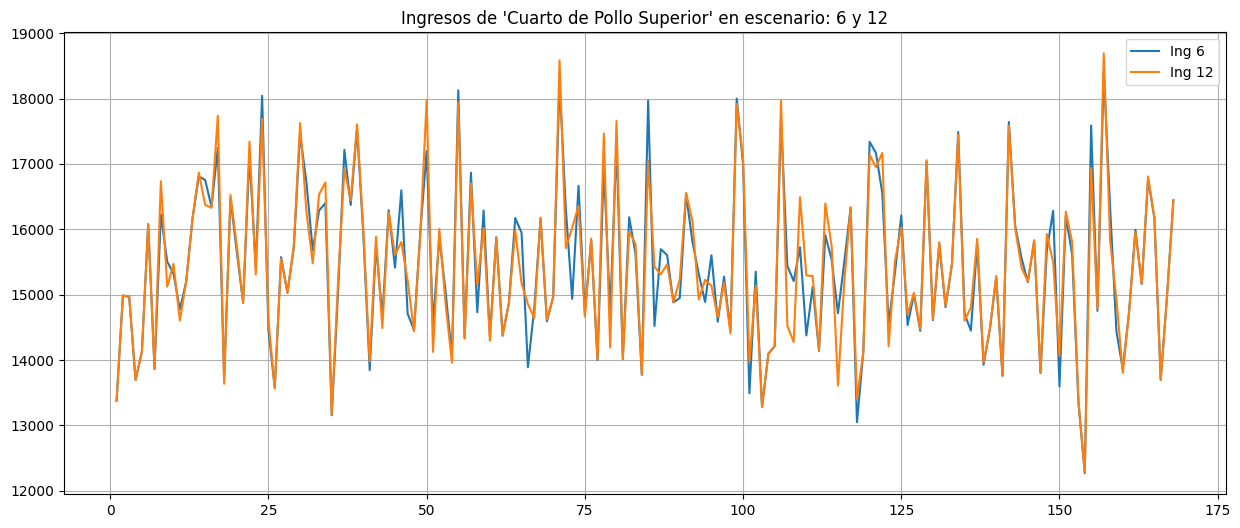

In [125]:
def generador_ingresos(experiment, replics=50):
    file_name = f"Resultados/{q}/Escenario {experiment}/"
    ing = pd.read_csv(file_name+"ingresos.csv", sep=";")
    ing['value'] = ing['value']/replics
    ing = ing.groupby(['f','t']).sum().reset_index()[['f', 't','value']]
    return ing

#Ingresos
ing_A = generador_ingresos(escenario_A)
ing_B = generador_ingresos(escenario_B)


plt.figure(figsize=(15,6))
plt.grid(True)

plt.plot(ing_A.t[ing_A.f == variable], ing_A.value[ing_A.f == variable], label=f"Ing {escenario_A}")
plt.plot(ing_B.t[ing_B.f == variable], ing_B.value[ing_B.f == variable], label=f"Ing {escenario_B}")

plt.legend()
plt.title(label=f"Ingresos de '{variable}' en escenario: {escenario_A} y {escenario_B}")
plt.show()

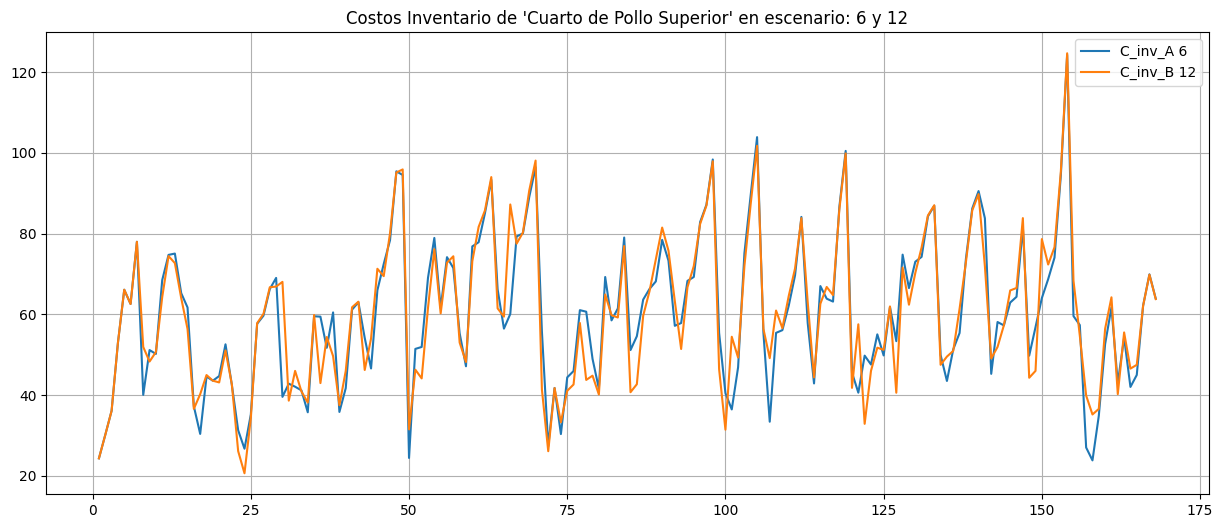

In [126]:
def generador_cotos_inventario(experiment, replics=50):
    file_name = f"Resultados/{q}/Escenario {experiment}/"
    c_inv = pd.read_csv(file_name+"costo_inventario.csv", sep=";")
    c_inv['value'] = c_inv['value']/replics
    c_inv = c_inv.groupby(['f','t']).sum().reset_index()[['f', 't','value']]
    return c_inv

#Ingresos
c_inv_A = generador_cotos_inventario(escenario_A)
c_inv_B = generador_cotos_inventario(escenario_B)


plt.figure(figsize=(15,6))
plt.grid(True)

plt.plot(c_inv_A.t[c_inv_A.f == variable], c_inv_A.value[c_inv_A.f == variable], label=f"C_inv_A {escenario_A}")
plt.plot(c_inv_B.t[c_inv_B.f == variable], c_inv_B.value[c_inv_B.f == variable], label=f"C_inv_B {escenario_B}")

plt.legend()
plt.title(label=f"Costos Inventario de '{variable}' en escenario: {escenario_A} y {escenario_B}")
plt.show()

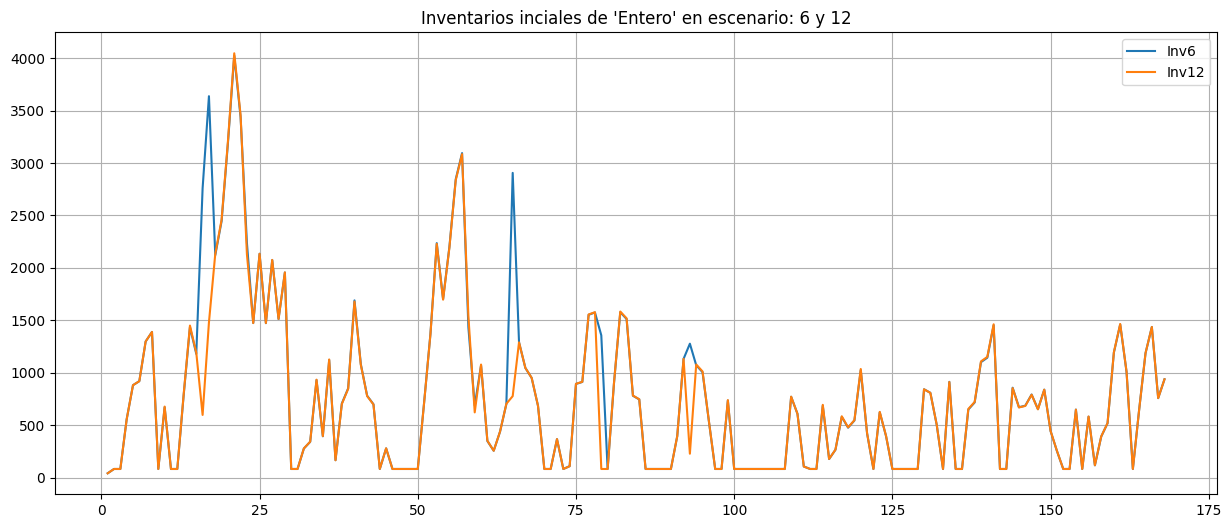

In [144]:
def generador_inventarios_iniciales(experiment, replics=50):
    file_name = f"Resultados/{q}/Escenario {experiment}/"
    S_inicial = pd.read_csv(file_name+"S_inicial.csv", sep=";")
    S_inicial = S_inicial[S_inicial.r==1]
    return S_inicial


S_A_inicial = generador_inventarios_iniciales(escenario_A)
S_B_inicial = generador_inventarios_iniciales(escenario_B)

plt.figure(figsize=(15,6))
plt.grid(True)

plt.plot(S_A_inicial.t[S_A_inicial.f == variable], S_A_inicial.value[S_A_inicial.f == variable], label=f"Inv{escenario_A}")
plt.plot(S_B_inicial.t[S_B_inicial.f == variable], S_B_inicial.value[S_B_inicial.f == variable], label=f"Inv{escenario_B}") 

plt.legend()
plt.title(label=f"Inventarios inciales de '{variable}' en escenario: {escenario_A} y {escenario_B}")
plt.show()

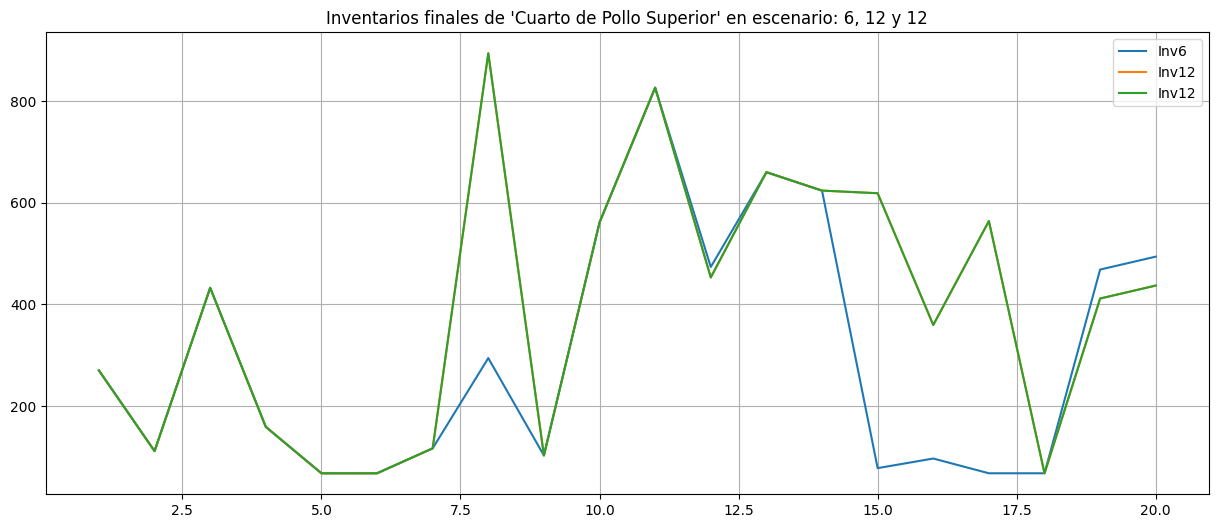

In [128]:
def generador_inventarios(experiment, replics=50):
    file_name = f"Resultados/{q}/Escenario {experiment}/"
    S = pd.read_csv(file_name+"S.csv", sep=";")
    S = S[S.r==1]
    S = S[S.t <= 20]
    #S['value'] = S['value']/replics
    #S = S.groupby(['f','t']).sum().reset_index()[['f', 't','value']]
    return S

S_A = generador_inventarios(escenario_A)
S_B = generador_inventarios(escenario_B)
S_C = generador_inventarios(escenario_C)

plt.figure(figsize=(15,6))
plt.grid(True)

plt.plot(S_A.t[S_A.f == variable], S_A.value[S_A.f == variable], label=f"Inv{escenario_A}")
plt.plot(S_B.t[S_B.f == variable], S_B.value[S_B.f == variable], label=f"Inv{escenario_B}") 
plt.plot(S_C.t[S_C.f == variable], S_C.value[S_C.f == variable], label=f"Inv{escenario_C}") 

plt.legend()
plt.title(label=f"Inventarios finales de '{variable}' en escenario: {escenario_A}, {escenario_B} y {escenario_C}")
plt.show()

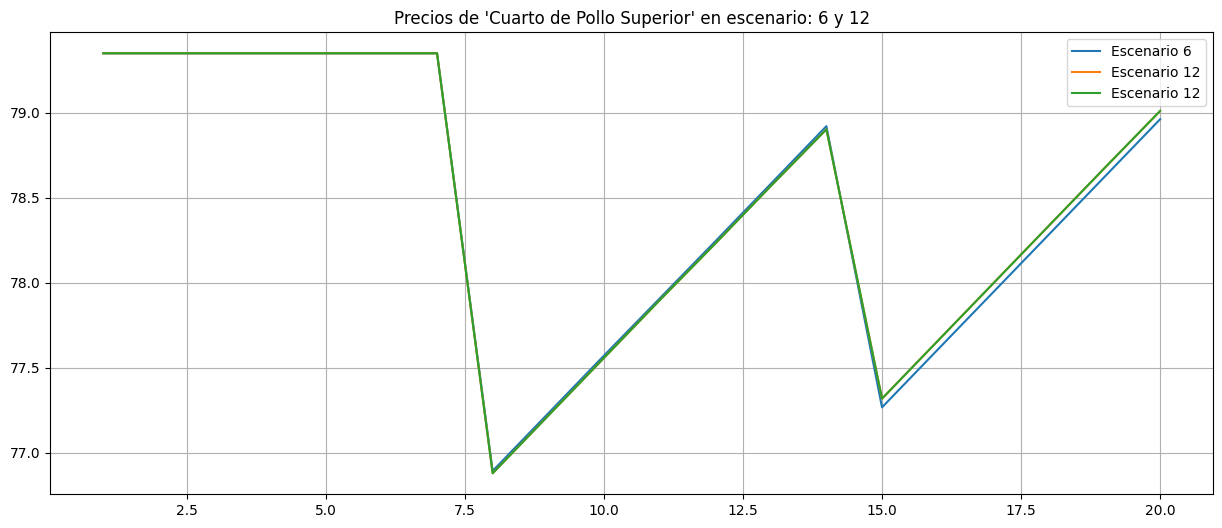

In [129]:
def generador_precios(experiment, replics=50):
    file_name = f"Resultados/{q}/Escenario {experiment}/"
    P = pd.read_csv(file_name+"P.csv", sep=";")
    P = P[P.r==1]
    P = P[P.t <= 20]
    #P['value'] = P['value']/replics
    #P = P.groupby(['f','t']).sum().reset_index()[['f', 't','value']]
    return P

P_A = generador_precios(escenario_A)
P_B = generador_precios(escenario_B)
P_C = generador_precios(escenario_C)

#Precios
plt.figure(figsize=(15,6))
plt.grid(True)

plt.plot(P_A.t[P_A.f == variable], P_A.value[P_A.f == variable], label=f"Escenario {escenario_A}")
plt.plot(P_B.t[P_B.f == variable], P_B.value[P_B.f == variable], label=f"Escenario {escenario_B}") 
plt.plot(P_C.t[P_C.f == variable], P_C.value[P_C.f == variable], label=f"Escenario {escenario_C}") 

plt.legend()
plt.title(label=f"Precios de '{variable}' en escenario: {escenario_A} y {escenario_B}")
plt.show()

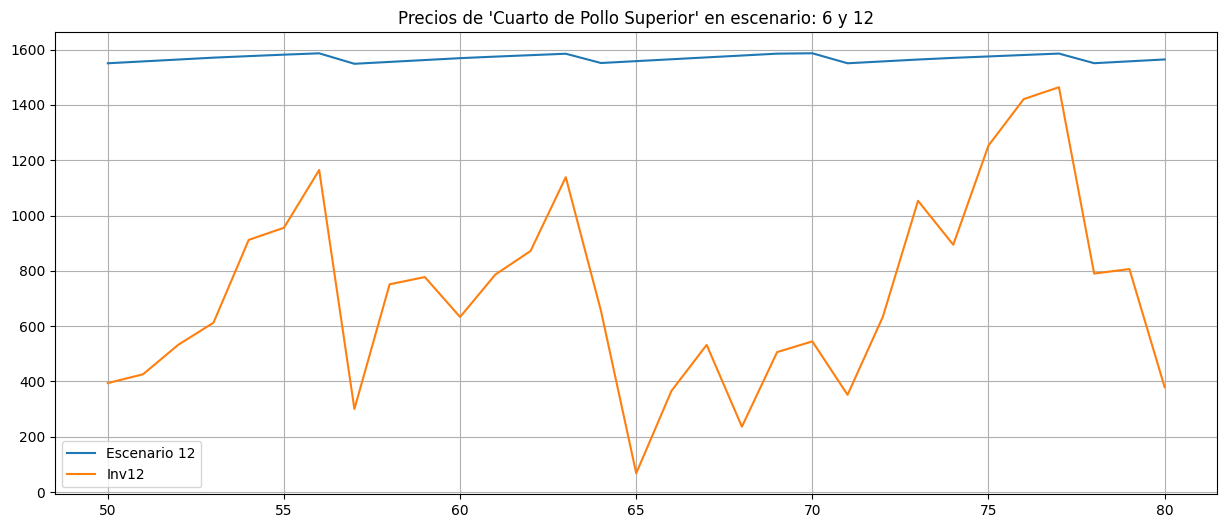

In [130]:
def generador_precios(experiment, replics=50):
    file_name = f"Resultados/{q}/Escenario {experiment}/"
    P = pd.read_csv(file_name+"P.csv", sep=";")
    P = P[P.r==1]
    P = P[P.t>=50][P.t<=80]
    P['value'] *= 20
    #P['value'] = P['value']/replics
    #P = P.groupby(['f','t']).sum().reset_index()[['f', 't','value']]
    return P

def generador_inventarios(experiment, replics=50):
    file_name = f"Resultados/{q}/Escenario {experiment}/"
    S = pd.read_csv(file_name+"S.csv", sep=";")
    S = S[S.r==1]
    S = S[S.t>=50][S.t<=80]
    #S['value'] = S['value']/replics
    #S = S.groupby(['f','t']).sum().reset_index()[['f', 't','value']]
    return S

S_A = generador_inventarios(escenario_A)
S_B = generador_inventarios(escenario_B)
S_C = generador_inventarios(escenario_C)

P_A = generador_precios(escenario_A)
P_B = generador_precios(escenario_B)
P_C = generador_precios(escenario_C)

#Precios
plt.figure(figsize=(15,6))
#plt.xticks(np.arange(0, 30, 1), minor=True)
plt.grid(True)


#plt.plot(P_A.t[P_A.f == variable], P_A.value[P_A.f == variable], label=f"Escenario {escenario_A}")
#plt.plot(P_B.t[P_B.f == variable], P_B.value[P_B.f == variable], label=f"Escenario {escenario_B}") 
plt.plot(P_C.t[P_C.f == variable], P_C.value[P_C.f == variable], label=f"Escenario {escenario_C}") 

#plt.plot(S_A.t[S_A.f == variable], S_A.value[S_A.f == variable], label=f"Inv{escenario_A}")
#plt.plot(S_B.t[S_B.f == variable], S_B.value[S_B.f == variable], label=f"Inv{escenario_B}") 
plt.plot(S_C.t[S_C.f == variable], S_C.value[S_C.f == variable], label=f"Inv{escenario_C}") 


plt.legend()
plt.title(label=f"Precios de '{variable}' en escenario: {escenario_A} y {escenario_B}")
plt.show()

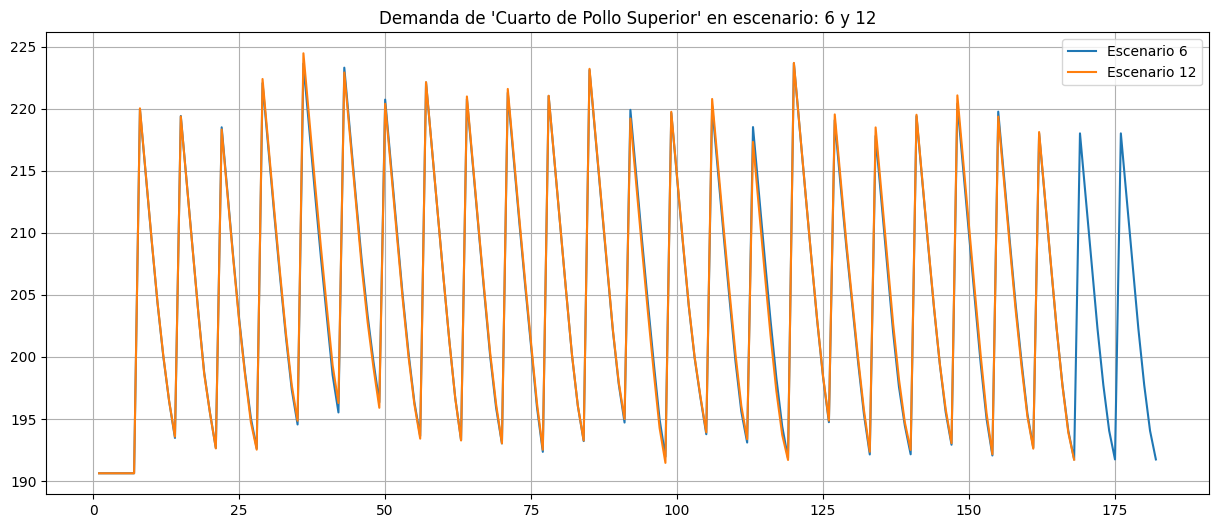

In [131]:
def generador_dda(experiment, replics=50):
    file_name = f"Resultados/{q}/Escenario {experiment}/"
    D = pd.read_csv(file_name+"D.csv", sep=";")
    D['value'] = D['value']/replics
    D = D.groupby(['f','t']).sum().reset_index()[['f', 't','value']]
    return D

D_A = generador_dda(escenario_A)
D_B = generador_dda(escenario_B)

#Precios
plt.figure(figsize=(15,6))
plt.grid(True)

plt.plot(D_A.t[D_A.f == variable], D_A.value[D_A.f == variable], label=f"Escenario {escenario_A}")
plt.plot(D_B.t[D_B.f == variable], D_B.value[D_B.f == variable], label=f"Escenario {escenario_B}") 

plt.legend()
plt.title(label=f"Demanda de '{variable}' en escenario: {escenario_A} y {escenario_B}")
plt.show()

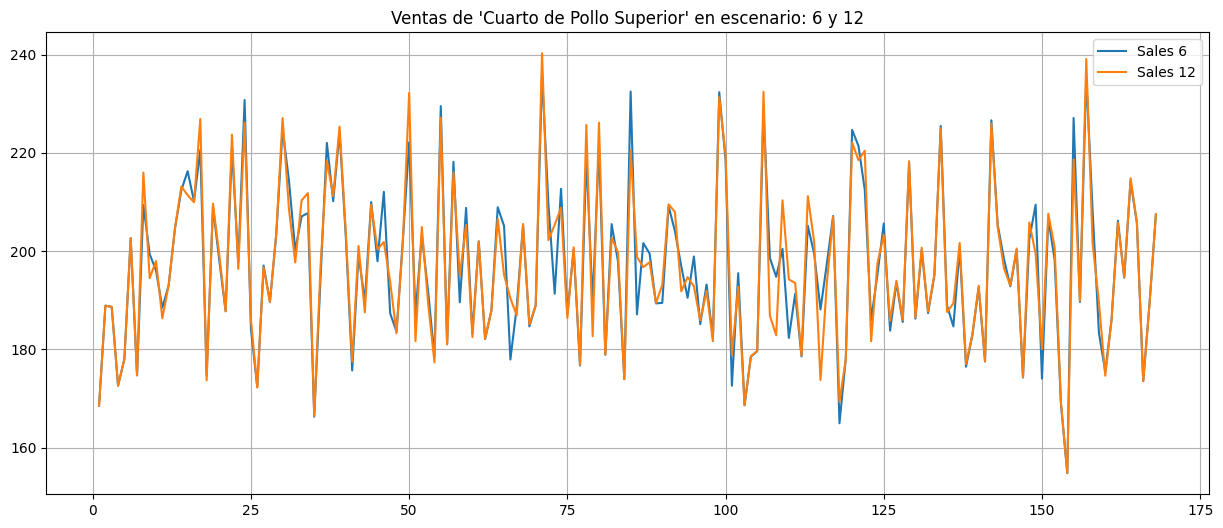

In [132]:
def generador_venta(experiment, replics=50):
    file_name = f"Resultados/{q}/Escenario {experiment}/"
    sales = pd.read_csv(file_name+"sales.csv", sep=";")
    sales['value'] = sales['value']/replics
    sales = sales.groupby(['f','t']).sum().reset_index()[['f', 't','value']]
    return sales

sales_A = generador_venta(escenario_A)
sales_B = generador_venta(escenario_B)
        
plt.figure(figsize=(15,6))
plt.grid(True)

plt.plot(sales_A.t[sales_A.f == variable], sales_A.value[sales_A.f == variable], label=f"Sales {escenario_A}")
plt.plot(sales_B.t[sales_B.f == variable], sales_B.value[sales_B.f == variable], label=f"Sales {escenario_B}") 

plt.legend()
plt.title(label=f"Ventas de '{variable}' en escenario: {escenario_A} y {escenario_B}")
plt.show()

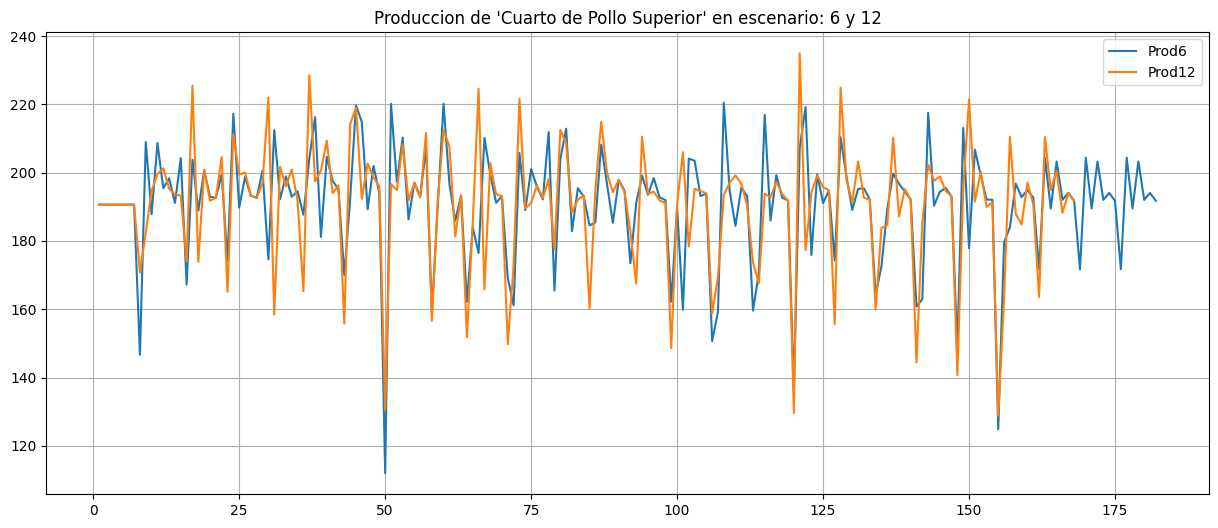

In [133]:
def generador_produccion(experiment, replics=50):
    file_name = f"Resultados/{q}/Escenario {experiment}/"
    prod = pd.read_csv(file_name+"prod.csv", sep=";")
    prod['value'] = prod['value']/replics
    prod = prod.groupby(['f','t']).sum().reset_index()[['f', 't','value']]
    return prod

prod_A = generador_produccion(escenario_A)
prod_B = generador_produccion(escenario_B)

plt.figure(figsize=(15,6))
plt.grid(True)

# Produccion
plt.plot(prod_A.t[prod_A.f == variable], prod_A.value[prod_A.f == variable], label=f"Prod{escenario_A}")
plt.plot(prod_B.t[prod_B.f == variable], prod_B.value[prod_B.f == variable], label=f"Prod{escenario_B}")

plt.legend()
plt.title(label=f"Produccion de '{variable}' en escenario: {escenario_A} y {escenario_B}")
plt.show()

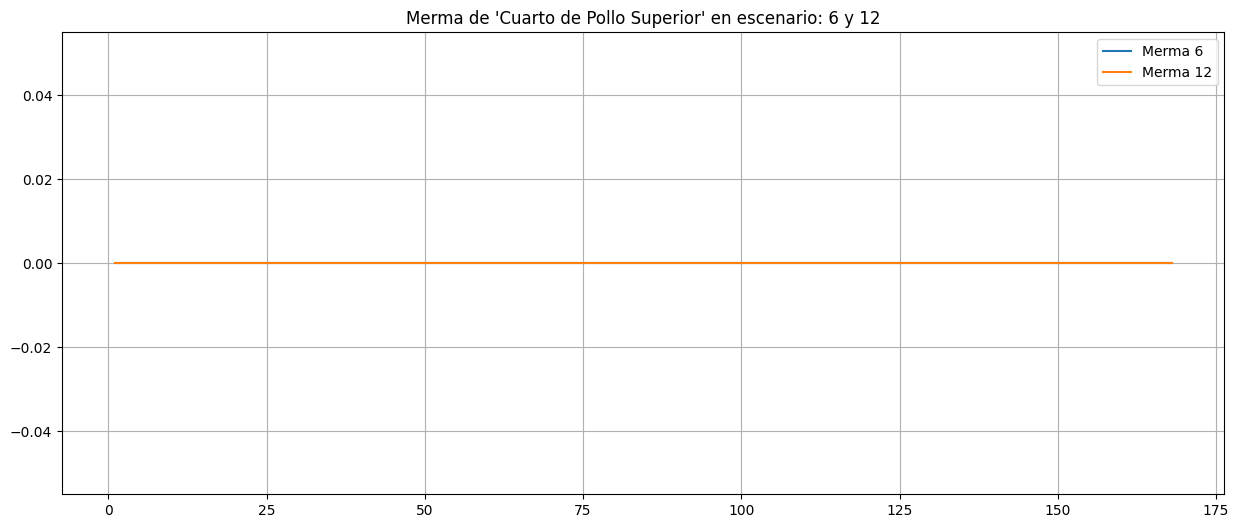

In [134]:

def generador_merma(experiment, replics=50):
    file_name = f"Resultados/{q}/Escenario {experiment}/"
    L = pd.read_csv(file_name+"L.csv", sep=";")
    L['value'] = L['value']/replics
    L = L.groupby(['f','t']).sum().reset_index()[['f', 't','value']]
    return L

plt.figure(figsize=(15,6))
plt.grid(True)

merma_A = generador_merma(escenario_A)
merma_B = generador_merma(escenario_B)

# Merma
plt.plot(merma_A.t[merma_A.f == variable], merma_A.value[merma_A.f == variable], label=f"Merma {escenario_A}")
plt.plot(merma_B.t[merma_B.f == variable], merma_B.value[merma_B.f == variable], label=f"Merma {escenario_B}")

plt.legend()
plt.title(label=f"Merma de '{variable}' en escenario: {escenario_A} y {escenario_B}")
plt.show()

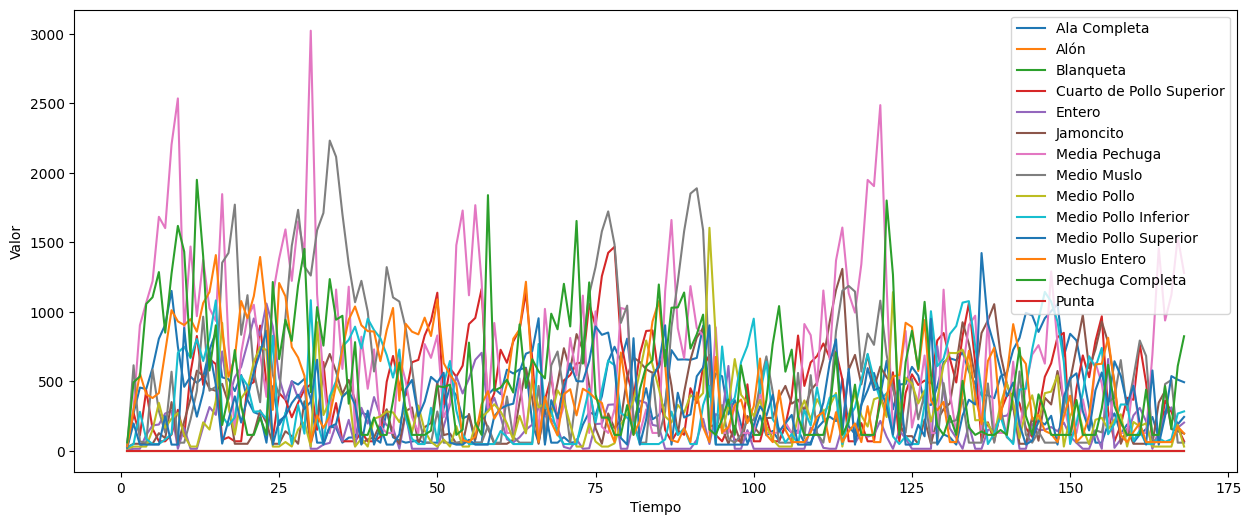

In [135]:
# Agrupar los datos por producto
def generador_inventarios_iniciales(experiment, replics=50):
    file_name = f"Resultados/{q}/Escenario {experiment}/"
    S_inicial = pd.read_csv(file_name+"S_inicial.csv", sep=";")
    S_inicial = S_inicial[S_inicial.r == 1]
    #S_inicial['value'] = S_inicial['value']/replics
    #S_inicial = S_inicial.groupby(['f','t']).sum().reset_index()[['f', 't','value']]
    return S_inicial


S_A_inicial = generador_inventarios_iniciales(escenario_A)

productos = S_A_inicial.groupby('f')
plt.figure(figsize=(15,6))

# Crear un gráfico para cada producto
for producto, datos_producto in productos:
        #if producto in ['Pechuga Completa']:
        plt.plot(datos_producto['t'], datos_producto['value'], label=producto)

# Personalizar el gráfico
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()

# Mostrar el gráfico
plt.show()

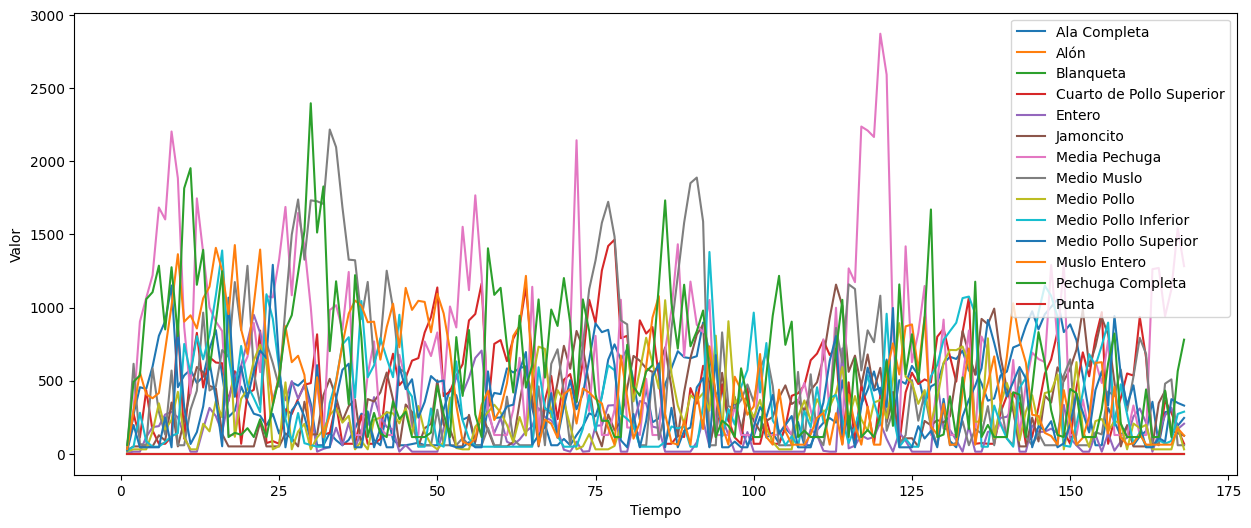

In [136]:
# Agrupar los datos por producto
S_B_inicial = generador_inventarios_iniciales(escenario_B)

productos = S_B_inicial.groupby('f')

plt.figure(figsize=(15,6))

# Crear un gráfico para cada producto
for producto, datos_producto in productos:
        #if producto in ['Pechuga Completa']:
        plt.plot(datos_producto['t'], datos_producto['value'], label=producto)

# Personalizar el gráfico
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()

# Mostrar el gráfico
plt.show()

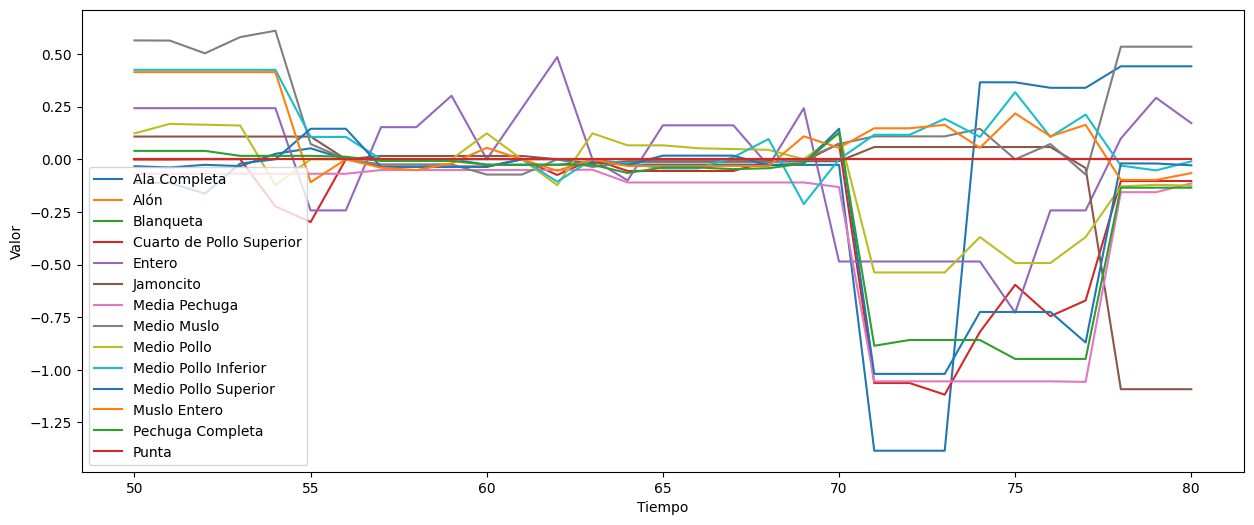

In [137]:
# Calculo de la diferencia de variables
df = pd.merge(P_A, P_B, on=['f', 't'])
df['value'] = df['value_x'] - df['value_y']

productos = df.groupby('f')

plt.figure(figsize=(15,6))

# Crear un gráfico para cada producto
for producto, datos_producto in productos:
        plt.plot(datos_producto['t'], datos_producto['value'], label=producto)

# Personalizar el gráfico
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()

# Mostrar el gráfico
plt.show()

In [148]:
q = 5000
for experiment in range (1, 13):
    if experiment in [1]:
        file_name = f"~/Desktop/Produccion-Tesis/Resultados/{q}/Escenario {experiment}/"
        df = pd.read_csv(file_name+"objective_value.csv", sep=";").rename(columns={'value': 'utilidad'}).groupby(['r']).sum().reset_index()['utilidad']
        df1 = pd.read_csv(file_name+"ingresos.csv", sep=";").rename(columns={'value': 'ingresos'}).groupby(['r']).sum().reset_index()['ingresos']
        df2 = pd.read_csv(file_name+"costo_inventario.csv", sep=";").rename(columns={'value': 'costo inventario'}).groupby(['r']).sum().reset_index()['costo inventario']
        df3 = pd.read_csv(file_name+"costo_corte.csv", sep=";").rename(columns={'value': 'costo corte'}).groupby(['r']).sum().reset_index()['costo corte']
        df4 = pd.read_csv(file_name+"costo_merma.csv", sep=";").rename(columns={'value': 'costo merma'}).groupby(['r']).sum().reset_index()['costo merma']
        df_A = pd.concat([df, df1, df2, df3, df4], axis=1).reset_index().rename(columns={'utilidad': 'utilidad_A', 'ingresos': 'ingresos_A', 'costo inventario': 'costo inventario_A', 'costo corte': 'costo corte_A', 'costo merma': 'costo merma_A'})

df_A.sum()

index                 4.500000e+01
utilidad_A            7.103160e+08
ingresos_A            8.045260e+08
costo inventario_A    6.331990e+06
costo corte_A         8.787670e+07
costo merma_A         1.291496e+03
dtype: float64

In [149]:
sys.path.append('/Users/moises/Desktop/Experimentos')

for experiment in range (1, 13):
    if experiment in [6]:
        file_name = f"~/Desktop/Produccion-Tesis/Resultados/{q}/Escenario {experiment}/"
        df = pd.read_csv(file_name+"objective_value.csv", sep=";").rename(columns={'value': 'utilidad'}).groupby(['r']).sum().reset_index()['utilidad']
        df1 = pd.read_csv(file_name+"ingresos.csv", sep=";").rename(columns={'value': 'ingresos'}).groupby(['r']).sum().reset_index()['ingresos']
        df2 = pd.read_csv(file_name+"costo_inventario.csv", sep=";").rename(columns={'value': 'costo inventario'}).groupby(['r']).sum().reset_index()['costo inventario']
        df3 = pd.read_csv(file_name+"costo_corte.csv", sep=";").rename(columns={'value': 'costo corte'}).groupby(['r']).sum().reset_index()['costo corte']
        df4 = pd.read_csv(file_name+"costo_merma.csv", sep=";").rename(columns={'value': 'costo merma'}).groupby(['r']).sum().reset_index()['costo merma']
        df_B = pd.concat([df, df1, df2, df3, df4], axis=1).reset_index().rename(columns={'utilidad': 'utilidad_B', 'ingresos': 'ingresos_B', 'costo inventario': 'costo inventario_B', 'costo corte': 'costo corte_B', 'costo merma': 'costo merma_B'})
df_B.sum()


index                 4.500000e+01
utilidad_B            7.138340e+08
ingresos_B            8.042116e+08
costo inventario_B    2.682255e+06
costo corte_B         8.769508e+07
costo merma_B         2.306472e+02
dtype: float64

In [150]:
df = df_A.merge(df_B, on=['index'], how='inner')
df['utilidad %'] = round(100*(df['utilidad_A']-df['utilidad_B'])/df['utilidad_B'], 2)
df

,index,utilidad_A,ingresos_A,costo inventario_A,costo corte_A,costo merma_A,utilidad_B,ingresos_B,costo inventario_B,costo corte_B,costo merma_B,utilidad %
0,0,7.131074e+07,8.073749e+07,630738.943400,8.795897e+06,111.162745,7.154976e+07,8.058133e+07,249621.638234,8781921.348,24.423837,-0.33
1,1,7.122830e+07,8.063686e+07,613999.082525,8.794518e+06,46.438359,7.147646e+07,8.051732e+07,267124.464263,8773714.736,20.596309,-0.35
2,2,7.087680e+07,8.037913e+07,713382.631327,8.788721e+06,218.192760,7.136350e+07,8.041570e+07,282565.347497,8769629.555,5.238886,-0.68
3,3,7.087518e+07,8.028401e+07,631774.781676,8.776778e+06,283.020701,7.124627e+07,8.027614e+07,269382.877522,8760455.625,36.967840,-0.52
4,4,7.103386e+07,8.043393e+07,606135.214438,8.793859e+06,83.400594,7.130304e+07,8.034267e+07,263751.891618,8775829.229,42.740916,-0.38
5,5,7.107787e+07,8.051207e+07,656144.958313,8.777935e+06,126.351580,7.139293e+07,8.042918e+07,276642.719638,8759574.453,30.654945,-0.44
6,6,7.109282e+07,8.044131e+07,559111.833933,8.789367e+06,12.561884,7.138628e+07,8.040577e+07,248174.648487,8771311.184,3.021983,-0.41
7,7,7.102838e+07,8.046267e+07,649271.329843,8.784696e+06,323.126275,7.140188e+07,8.044096e+07,274628.308908,8764431.310,27.706510,-0.52
8,8,7.097506e+07,8.038531e+07,617735.382393,8.792439e+06,77.723100,7.143146e+07,8.046702e+07,263686.217439,8771863.555,16.502000,-0.64
9,9,7.081699e+07,8.025319e+07,653696.039490,8.782491e+06,9.517853,7.128243e+07,8.033548e+07,286677.076673,8766347.933,22.793933,-0.65


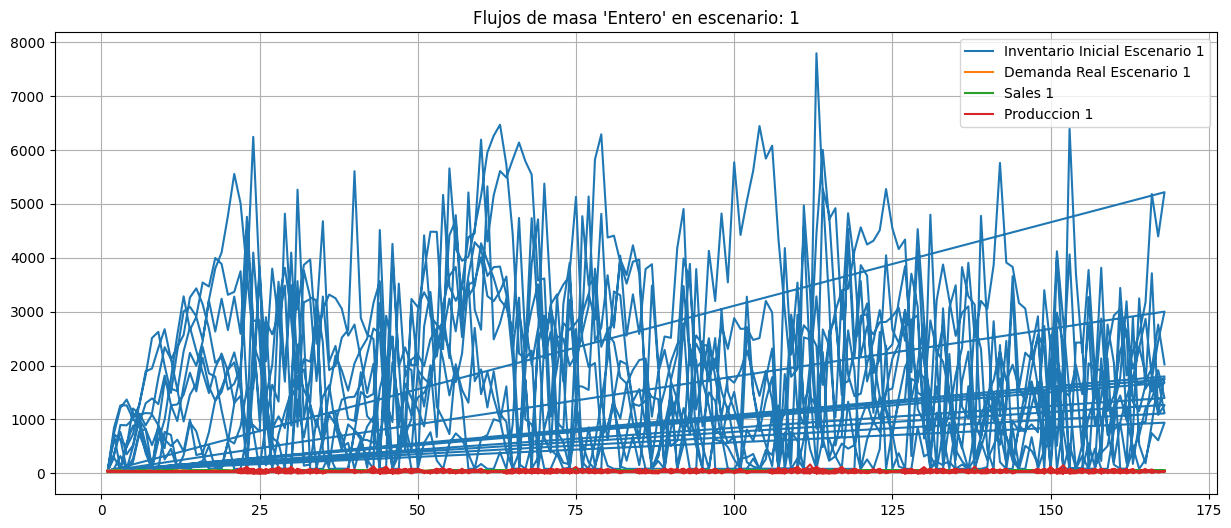

In [141]:
tiempo = 0
escenario = 1
variable = 'Entero'

def generador_inventarios_iniciales(experiment, replics=50):
    file_name = f"Resultados/{q}/Escenario {experiment}/"
    S_inicial = pd.read_csv(file_name+"S_inicial.csv", sep=";")
    S_inicial = S_inicial[S_inicial.t >= tiempo]
    return S_inicial

def generador_inventarios_finales(experiment, replics=50):
    file_name = f"Resultados/{q}/Escenario {experiment}/"
    S = pd.read_csv(file_name+"S.csv", sep=";")
    S = S[S.t >= tiempo]
    return S

def generador_dda(experiment, replics=50):
    file_name = f"Resultados/{q}/Escenario {experiment}/"
    D = pd.read_csv(file_name+"D.csv", sep=";")
    D['value'] = D['value']/replics
    D = D[D.t >= tiempo]
    return D

def generador_dda_real(experiment, replics=50):
    file_name = f"Resultados/{q}/Escenario {experiment}/"
    D = pd.read_csv(file_name+"D_real.csv", sep=";")
    D['value'] = D['value']/replics
    D = D[D.t >= tiempo]
    return D

def generador_venta(experiment, replics=50):
    file_name = f"Resultados/{q}/Escenario {experiment}/"
    sales = pd.read_csv(file_name+"sales.csv", sep=";")
    sales['value'] = sales['value']/replics
    return sales

def generador_produccion(experiment, replics=50):
    file_name = f"Resultados/{q}/Escenario {experiment}/"
    prod = pd.read_csv(file_name+"prod.csv", sep=";")
    prod['value'] = prod['value']/replics
    prod = prod[prod.t >= tiempo]
    return prod


D_A = generador_dda(escenario).loc[:, ['f', 't', 'value']]
D_A_real = generador_dda_real(escenario).loc[:, ['f', 't', 'value']]
S_A_inicial = generador_inventarios_iniciales(escenario).loc[:, ['f', 't', 'value']]
S_A = generador_inventarios_finales(escenario).loc[:, ['f', 't', 'value']]
sales_A = generador_venta(escenario).loc[:, ['f', 't', 'value']]
prod_A = generador_produccion(escenario).loc[:, ['f', 't', 'value']]

#analisis = pd.merge(pd.merge(pd.merge(D_A_real, S_A_inicial, on=['f', 't']), sales_A,  on=['f', 't']), prod_A, on=['f', 't'])
#analisis.to_excel('Analisis Flujo.xlsx')

#Precios
plt.figure(figsize=(15,6))
plt.grid(True)

plt.plot(S_A_inicial.t[S_A_inicial.f == variable], S_A_inicial.value[S_A_inicial.f == variable], label=f"Inventario Inicial Escenario {escenario}")
#plt.plot(S_A.t[S_A.f == variable], S_A.value[S_A.f == variable], label=f"Inventario Final Escenario {escenario}")
#plt.plot(D_A.t[D_A.f == variable], D_A.value[D_A.f == variable], label=f"Demanda Escenario {escenario}")
plt.plot(D_A_real.t[D_A_real.f == variable], D_A_real.value[D_A_real.f == variable], label=f"Demanda Real Escenario {escenario}")
plt.plot(sales_A.t[sales_A.f == variable], sales_A.value[sales_A.f == variable], label=f"Sales {escenario}")
plt.plot(prod_A.t[prod_A.f == variable], prod_A.value[prod_A.f == variable], label=f"Produccion {escenario}")

plt.legend()
plt.title(label=f"Flujos de masa '{variable}' en escenario: {escenario}")
plt.show()

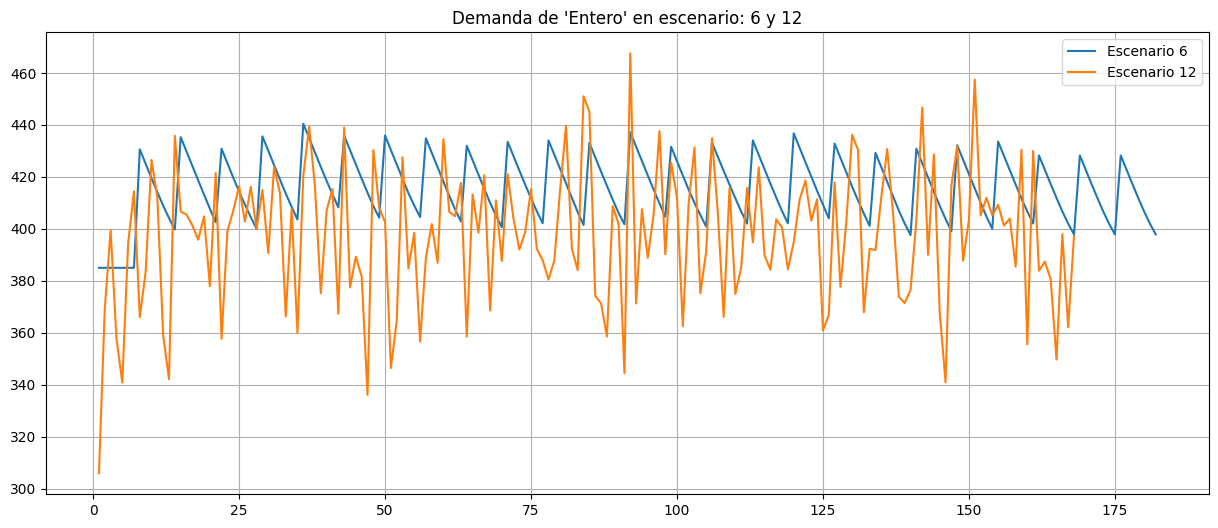

In [142]:
def generador_venta(experiment, replics=50):
    file_name = f"Resultados/{q}/Escenario {experiment}/"
    sales = pd.read_csv(file_name+"sales.csv", sep=";")
    sales['value'] = sales['value']/replics
    sales = sales.groupby(['f','t']).sum().reset_index()[['f', 't','value']]
    return sales

sales_A = generador_venta(6)

def generador_dda(experiment, replics=50):
    file_name = f"Resultados/{q}/Escenario {experiment}/"
    D = pd.read_csv(file_name+"D.csv", sep=";")
    D['value'] = D['value']/replics
    D = D.groupby(['f','t']).sum().reset_index()[['f', 't','value']]
    return D

D_A = generador_dda(6)

#Precios
plt.figure(figsize=(15,6))
plt.grid(True)

plt.plot(D_A.t[D_A.f == variable], D_A.value[D_A.f == variable], label=f"Escenario {escenario_A}")
plt.plot(sales_A.t[sales_A.f == variable], sales_A.value[sales_A.f == variable], label=f"Escenario {escenario_B}") 

plt.legend()
plt.title(label=f"Demanda de '{variable}' en escenario: {escenario_A} y {escenario_B}")
plt.show()



In [143]:
import pandas as pd

K, F, a = read_sheet(f"~/Desktop/Produccion-Tesis/Input/Constante.csv", sep=";", "Patrones")

def generador_valores_residuales(replics=10):
        dictionary = {}
        P = pd.read_csv("~/Desktop/Produccion-Tesis/Resultados/{q}/Warmup/P.csv", sep=";")
        P['value'] = P['value']/replics
        P = P[['f','t','r','value']].groupby(['f','t']).sum().reset_index()[['f','t','value']]
        P = P[P.t == 21][['f', 'value']]
        for row, value in P.iterrows():
                dictionary[value['f']] = round(value['value'])
        return dictionary


def generador_inventarios_iniciales(F, replics=10):
        dictionary = {f: {} for f in F}
        S0 = pd.read_csv("~/Desktop/Produccion-Tesis/Resultados/{q}/Warmup/S0.csv", sep=";").reset_index()
        S0['value'] = S0['value']/replics
        S0 = S0[['f','u','r','value']].groupby(['f','u']).sum().reset_index()[['f','u','value']]
        for _, value in S0.iterrows():
                dictionary[value['f']][value['u']] = round(value['value'])
        return dictionary

SyntaxError: positional argument follows keyword argument (2248938828.py, line 3)

In [ ]:
S0 = generador_inventarios_iniciales(F)
S0

In [ ]:
import random
columnas = int(input())
filas = int(input())

matriz = []

for fila in range(filas):
    matriz.append([])
    for columna in range(columnas):
        matriz[fila].append(round(random.random(),2)*100)

print(matriz)

In [ ]:
from pprint import pprint 
def tercero(x):
    largo = len(x)
    return x[round(largo/2)]

matriz.sort(key=tercero, reverse=True)
pprint(matriz)